In [6]:
import numpy as np
from spatialmath import *
from math import pi

import matplotlib.pyplot as plt
%matplotlib notebook 

## Traslaciones ##

In [7]:
SE3()

   1         0         0         0         
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         


<IPython.core.display.Javascript object>


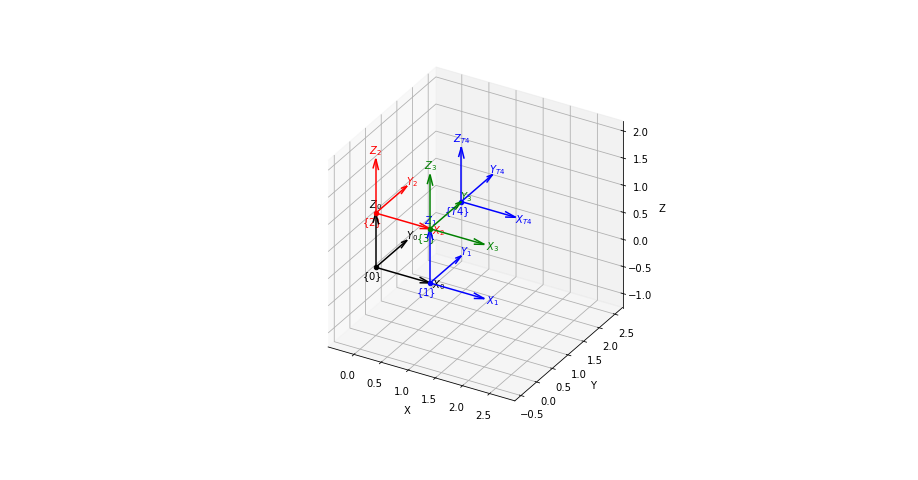

In [9]:
SE3().plot(frame='0', dims=[-3,3], color='black')

In [10]:
T1 = SE3.Tx(1)
T1.plot(frame='1')

In [11]:
T1

   1         0         0         1         
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         


In [12]:
T2 = SE3.Tz(1)
T2.plot(frame='2', color='red')

In [13]:
T3 = T2 * T1
T3.plot(frame='3', color='green')

In [14]:
T1

   1         0         0         1         
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         


In [15]:
T2

   1         0         0         0         
   0         1         0         0         
   0         0         1         1         
   0         0         0         1         


In [16]:
T3

   1         0         0         1         
   0         1         0         0         
   0         0         1         1         
   0         0         0         1         


# Propiedades de un objeto SO3

In [17]:
T3.n # vector n

array([1., 0., 0.])

In [18]:
T3.o

array([0., 1., 0.])

In [19]:
T3.a

array([0., 0., 1.])

In [20]:
T3.R # Submatriz de rotacion

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [21]:
T3.t # Submatriz de traslacion

array([1., 0., 1.])

In [22]:
T3.A # MTH como objeto numpy (perdemos métodos y propiedades)

array([[1., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

In [23]:
T4 = SE3(1,1,1)
T4.plot(frame='T4')
plt.show()

In [ ]:
# Si tenemos la terna 0 asociada a un robot, un punto P definido en base a la misma

<IPython.core.display.Javascript object>


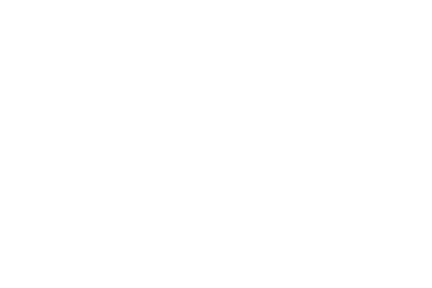

<IPython.core.display.Javascript object>


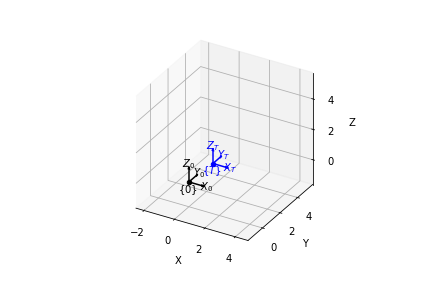

In [24]:
plt.figure()
SE3().plot(frame='0', dims=[-3,3], color='black')

In [25]:
P_0 = np.array([1,1,1])
P_0

array([1, 1, 1])

In [ ]:
# Movemos la terna de referencia mediante el vector (1,1,1)
# El mismo punto P, visto desde nuestra nueva terna 1

In [26]:
T = SE3(1,1,1)
T

   1         0         0         1         
   0         1         0         1         
   0         0         1         1         
   0         0         0         1         


In [27]:
T.plot(frame='T')

In [29]:
## REFERENCIAR P RESPECTO A T

## Rotaciones ##

In [30]:
R1 = SO3.Ry(pi/4)
R1

   0.7071    0         0.7071    
   0         1         0         
  -0.7071    0         0.7071    


<IPython.core.display.Javascript object>


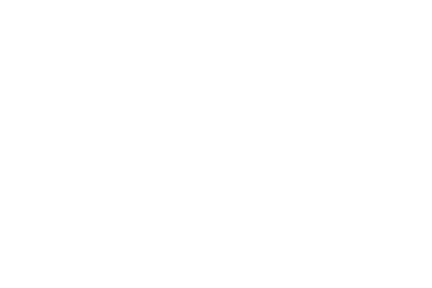

<IPython.core.display.Javascript object>


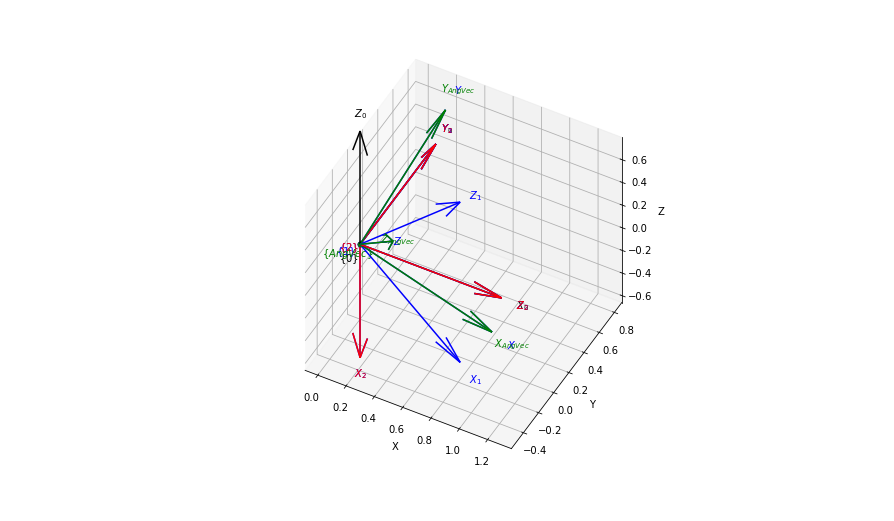

In [31]:
plt.figure()
SE3().plot(frame='0', color='black', dims=[0,2])
R1.plot(frame='1')

In [33]:
R2 = R1 * R1
R2.plot(frame='2', color = 'red')

In [34]:
SO3.Rz(45, 'deg')

   0.7071   -0.7071    0         
   0.7071    0.7071    0         
   0         0         1         


In [35]:
F = SO3.RPY([10, 20, 30], unit='deg') # ZYX RPY
F

   0.8138   -0.441     0.3785    
   0.4698    0.8826    0.01803   
  -0.342     0.1632    0.9254    


In [38]:
F.rpy(unit='deg')

array([10., 20., 30.])

In [41]:
R1.rpy()

array([0.        , 0.78539816, 0.        ])

In [46]:
R3 = SO3.AngVec(pi/4, [1,1,0])

<IPython.core.display.Javascript object>


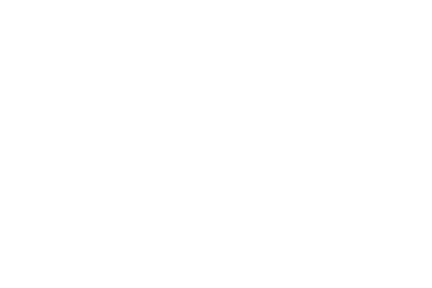

<IPython.core.display.Javascript object>


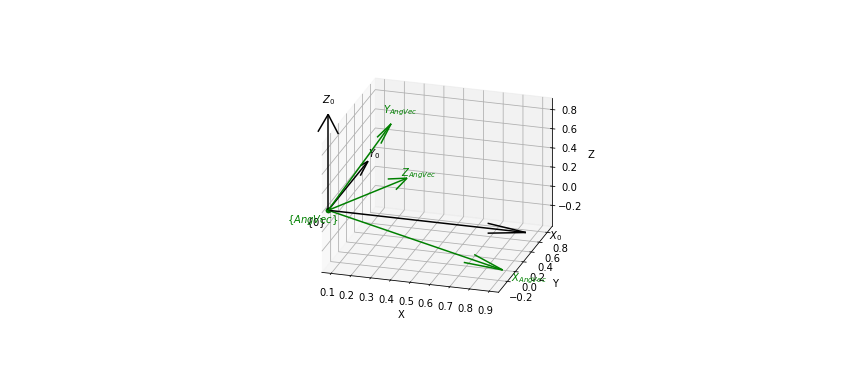

In [54]:
plt.figure()
R0 = SE3()
R0.plot(frame='0', color = 'black')
R3.plot(frame='AngVec', color = 'green')

## Composición ##

In [55]:
T1 =  SE3(1, 2, 3) * SE3.Rx(30, 'deg')
T1

   1         0         0         1         
   0         0.866    -0.5       2         
   0         0.5       0.866     3         
   0         0         0         1         


<IPython.core.display.Javascript object>


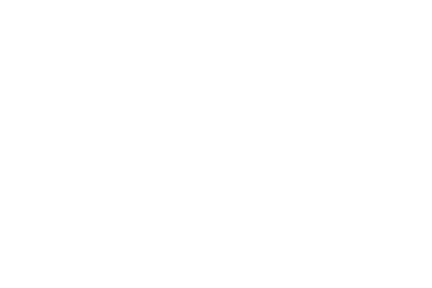

<IPython.core.display.Javascript object>


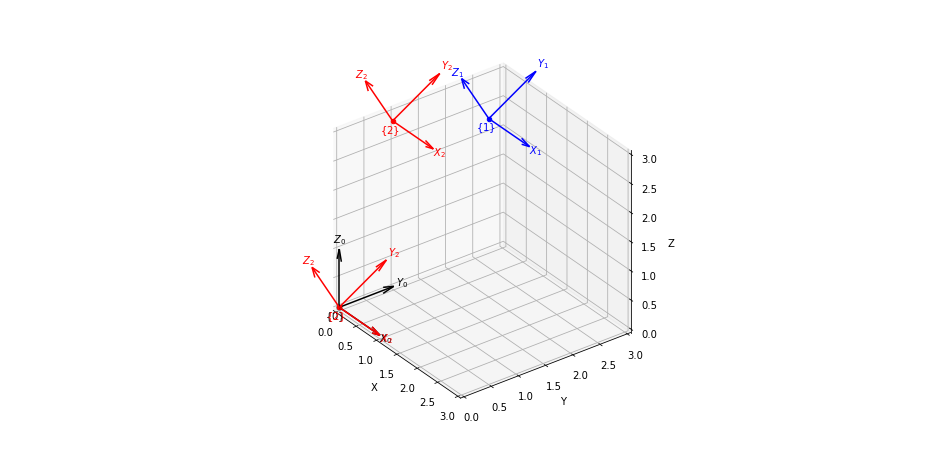

In [56]:
plt.figure()
SE3().plot(frame='0', dims=[0,3], color='black')
T1.plot(frame='1')

## Ejercitación ##

In [69]:
P = np.array([[-1, 1, 1, -1, -1, 1, 1, -1], 
              [-1, -1, 1, 1, -1, -1, 1, 1], 
              [-1, -1, -1, -1, 1, 1, 1, 1]])

In [64]:
# Realizar una rotación en Z de 60°
# y guardar en resultado en la variable Q
Q = P

<IPython.core.display.Javascript object>


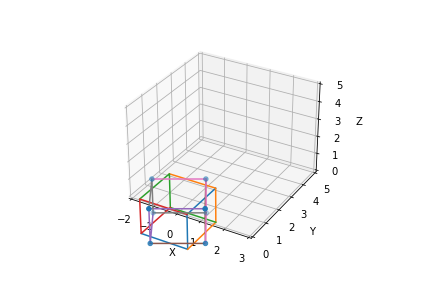

In [68]:
# TEST
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Vertices
ax.scatter(xs=Q[0], ys=Q[1], zs=Q[2], s=20)

# Lados
lines = [[0,1,5,6], [1,2,6,7], [2,3,7,4], [3,0,4,5]]
ax.set_xlim3d(-2, 3); ax.set_ylim3d(0, 5); ax.set_zlim3d(0, 5);
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z');

# Plot P
for line in lines:
    ax.plot([P[0,i] for i in line], [P[1,i] for i in line], [P[2,i] for i in line])
    
# Plot Q
for line in lines:
    ax.plot([Q[0,i] for i in line], [Q[1,i] for i in line], [Q[2,i] for i in line])